<center>
<img src="../img/python_theme.png">
# MLClass. "Прикладной анализ данных"
# Модуль "Инструментарий Data Science"
<img src="../img/mlclass_logo.jpg" height="240" width="240">

## Автор материала: Юрий Кашницкий, ФКН НИУ ВШЭ
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

In [ ]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
from builtins import *

## Пьяница
В игре в пьяницу карточная колода раздается поровну двум игрокам. Далее они вскрывают по одной верхней карте, и тот, чья карта старше, забирает себе обе вскрытые карты, которые кладутся под низ его колоды. Тот, кто остается без карт – проигрывает.

Для простоты будем считать, что все карты различны по номиналу, а также, что самая младшая карта побеждает самую старшую карту ("шестерка берет туза").

Игрок, который забирает себе карты, сначала кладет под низ своей колоды карту первого игрока, затем карту второго игрока (то есть карта второго игрока оказывается внизу колоды).

Напишите программу, которая моделирует игру в пьяницу и определяет, кто выигрывает. В игре участвует 10 карт, имеющих значения от 0 до 9, большая карта побеждает меньшую, карта со значением 0 побеждает карту 9.

**Входные данные**

Программа получает на вход две строки: первая строка содержит 5 карт первого игрока, вторая – 5 карт второго игрока. Карты перечислены сверху вниз, то есть каждая строка начинается с той карты, которая будет открыта первой.

**Выходные данные**

Программа должна определить, кто выигрывает при данной раздаче, и вывести слово first или second, после чего вывести количество ходов, сделанных до выигрыша. Если на протяжении $10^6$ ходов игра не заканчивается, программа должна вывести слово botva.

In [ ]:
from queue import Queue

first = Queue()
second = Queue()

for num in input().strip().split():
    first.put(int(num))

for num in input().strip().split():
    second.put(int(num))

def game_move(f, s):
    card1 = f.get()
    card2 = s.get()
    if card2 != 0 and card1 > card2 or card1 == 0 and card2 == 9:
        f.put(card1)
        f.put(card2)
    else:
        s.put(card1)
        s.put(card2)

moves = 0
while not first.empty() and not second.empty():
    game_move(first, second)
    moves += 1
    if moves >= 1000000:
        print("botva")
        break
else:
    if not first.empty():
        print("first", moves, sep=" ")
    elif not second.empty():
        print("second", moves, sep=" ")

# Задачи к уроку 5
http://informatics.mccme.ru/mod/statements/view.php?id=16625#1

## Задача A
Напишите функцию min4(a, b, c, d), вычисляющую минимум четырех чисел, которая не содержит инструкции if, а использует стандартную функцию min. Считайте четыре целых числа и выведите их минимум.

In [ ]:
def min4(a, b, c, d):
    return(min([a,b,c,d]))

a, b, c, d = int(input()), int(input()), int(input()), int(input())
print(min4(a, b, c, d))

## Задача В
Даны два действительных числа x и y. Проверьте, принадлежит ли точка с координатами (x;y) заштрихованному квадрату (включая его границу). Если точка принадлежит квадрату, выведите слово YES, иначе выведите слово NO. На рисунке сетка проведена с шагом 1.

<img src="../img/task_5B.png" height="240" width="240">
Решение должно содержать функцию IsPointInSquare(x, y), возвращающую True, если точка принадлежит квадрату и False, если не принадлежит. Основная программа должна считать координаты точки, вызвать функцию IsPointInSquare и в зависимости от возвращенного значения вывести на экран необходимое сообщение.
Функция IsPointInSquare не должна содержать инструкцию if.

In [ ]:
def IsPointInSquare(x, y):
   return(abs(x) + abs(y) <= 1) 

x = float(input())
y = float(input())
print("YES" if IsPointInSquare(x, y) else "NO")

## Задача С
Дано действительное положительное число a и целое неотрицательное число n. Вычислите $a^n$ не используя циклы и стандартную функцию pow, а используя рекуррентное соотношение $a^n=a*a^{n-1}$.

Решение оформите в виде функции power(a, n).

In [ ]:
def power(a, n):
    if n == 0:
        return 1
    else:
        return a*power(a, n-1)

print(power(int(input()),int(input())))

## Задача D
Дано натуральное число n>1. Проверьте, является ли оно простым. Программа должна вывести слово YES, если число простое и NO, если число составное.

Решение оформите в виде функции IsPrime(n), которая возвращает True для простых чисел и False для составных чисел. Решение должно иметь сложность O($\sqrt{n}$).

In [3]:
def IsPrime(n):
    div = 2
    while div <= (n)**(1/2):
        if n%div == 0:
            return False
        else:
            div += 1
    return True
print(IsPrime(int(input())))

True


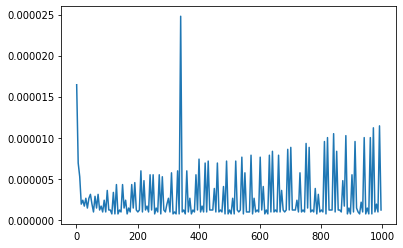

In [4]:
import matplotlib.pyplot as plt
import time

x_axis = [n for n in range(1, 1000, 5)]
y_axis = []
for x in x_axis:
    t1 = time.time()
    IsPrime(x)
    t2 = time.time()
    y_axis.append(t2-t1)

plt.plot(x_axis, y_axis)

## Задача E
По данным числам n и k ($0 \leq k \leq n$) вычислите $С^k_n$ . Для решения используйте рекуррентное соотношение $С^k_n = С_{n-1}^{k-1} + С_{n-1}^{k}$.

Решение оформите в виде функции C(n, k).


In [ ]:
def C(n, k):
    if k == 0 or k == n:
        return 1
    if k == 1:
        return n
    return C(n-1, k-1) + C(n-1, k)
print(C(int(input()), int(input())))

# Задача F
Напишите рекурсивную функцию sum(a, b), возвращающую сумму двух целых неотрицательных чисел. Из всех арифметических операций допускаются только +1 и -1. Также нельзя использовать циклы.



In [ ]:
def sum(a, b):
    if a == 0:
        return b
    if b == 0:
        return a
    return 1 + 1 + sum(a-1, b-1)

print(sum(int(input()), int(input())))

## Задача G
Дано натуральное число N и последовательность из N элементов. Требуется вывести эту последовательность в обратном порядке.
В программе запрещается объявлять массивы и использовать циклы (даже для ввода и вывода).